# Overview

A histogram is a type of graph or chart which attempts to give a visual representation of how data points are distributed within a data set. In other words it visualizes the distribution of a sample. As such, it is a tool for aiding in the description of data similar to descriptive statistics.

Practically speaking, a histogram is a bar chart which shows the number of times a particular element was found within a given data set.

We will see in a later sections that there are multiple ways to construct the histogram. We will also see that these different constructions offer different advantages in terms of their descriptive power.

# 1. Applications
As mentioned earlier, histograms allows us to make descriptive inferances; many of which are tied to descriptive statistics.

For example, we can visually infer the following sample statistics while looking at the distribution of data:

1. center (i.e., the location) of the data;
2. spread (i.e., the scale) of the data;
3. skewness of the data;
4. presence of outliers; and
5. presence of multiple modes in the data.

In addition to making descriptive inferences about the characteristics of the population distributions, histograms can also be used to extrapolate probabilities of observing events.

In this regard, histograms become extremely helpful when we are trying to model an unknown distribution or a problem without an analytical solution.

We will talk more about that in the coming sections.

# 2. Types of Histograms

There are a few different ways to impliment the historgram.

- Frequency Distribution
- Bin'ed Distributions

From these we can extrapolate:

- Cumulative frequency
- Cumulative binning

We are going to focus on the first three histograms in this notebook.

Some additional reading:
- https://www.itl.nist.gov/div898/handbook/eda/section3/histogra.htm
- https://plotly.com/chart-studio-help/histogram/

## 2.1 Frequency Distributions

We would use the simplest implimentation which literally count the number of occurances of each discrete value.

In some cases this is useful but in many cases this leaves too many "holes" in our distribution.

<img src='images/raw_frequency.png' style='width:300px'>

In extreme situations we we may notice that there isn't a real distribution being visualized... the data is just sort of "flat".

<img src='images/raw_data.png' style='width:300px'>


### 2.1.2 Binning and Bin'ed Distributions

Binning can help solve these problems by effectively changing our discretization. A good analogy would be a survey of peoples heights; measuring heights in millimeters may be too precise; resulting in "holes" or a "flat" distribution. If we changed our discretization to centimeters and rounded the raw data it might be more meaningful. We would thus derive frequcnies in terms of centimeters and may see the distribution become less flat or we might see holes get filled in. This process is a form of binning; we adopt a new discretization and map our raw data into it.

Practically speaking we can break the number line into segments and count the number of times a value falls within the segment

<img src='images/bins.png' style='width:300px'>

<img src='images/bin_frequency_image.png' style='width:300px'>

We can then plot the frequencies as a bar chart.

<img src='images/bar_chart_image.png' style='width:300px'>

While it gives an intuitive understanding of the distribution of our data it does not give an outright estimation of the likelihood. That will come from our inferred probability distirbution.

#### 2.1.2.1. Bin widths affect our observations

A few notes on how with withs or our bins may affect our inferences:

##### Bins do not need to be the same width

Bins widths can vary between the bins. In some cases this may be advantagous when there is a natural aymetry in the data; for example when looking at the Covid-90 death rate amongst age groups. In other cases it may make it dificult to interpret the results in certain situations.

##### Less granularity means less outliers

If the bins are too wide, we loose granularity and may not visualize outliers.

If the bins are too narrow, the natural dispersion of data may imply characteristics which are the result of sampling error.

##### Odd bucket numbers are bad??

Odd numbers are bad for some reason?

https://answerminer.com/blog/binning-guide-ideal-histogram

#### 2.1.2.2 Choosing a bin width

Now that we have talked about the pitfalls of binning, lets talk about some of the approaches to binning.

Generally spekaing, we can determine a bin width if we know how many bins we would like (assuming uniform width):

$$ bin \ width = \frac{X_{max} - X_{min}}{bin \ count} $$

Besides arbitrarily picking the number of bins, there are methods being specified to solve the problem:

<table>
    <thead>
		<tr>
			<th style="text-align: left;">Method</th>
			<th style="text-align: left;"># Bin</th>
            <th style="text-align: left;">Bin width</th>
		</tr>
    </thead>
    <colgroup>
       <col span="1" style="width: 35%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
	<tbody>
		<tr>
			<td style="text-align: left;">Square-root</td>
			<td style="text-align: left;">$\sqrt{N}$</td>
            <td style="text-align: left;">$\frac{max - min}{\# Bin}$</td>
		</tr>
        <tr>
			<td style="text-align: left;">Sturges 1926</td>
			<td style="text-align: left;">$ceil(\log_2{n})+1$</td>
            <td style="text-align: left;">$\frac{max - min}{\# Bin}$</td>
		</tr>
        <tr>
			<td style="text-align: left;">Rice 1944</td>
			<td style="text-align: left;">$2 \sqrt[3]{N}$</td>
            <td style="text-align: left;">$\frac{max - min}{\# Bin}$</td>
		</tr>
        <tr>
			<td style="text-align: left;">Scott 1979</td>
			<td style="text-align: left;">$\frac{max - min}{Bin width}$</td>
            <td style="text-align: left;">$3.5 * \frac{\sigma}{\sqrt[3]{N}}$</td>
		</tr>
        <tr>
			<td style="text-align: left;">Freedman-Diaconis 1989</td>
			<td style="text-align: left;">$\frac{max - min}{Bin width}$</td>
            <td style="text-align: left;">$2*\frac{IQR}{\sqrt[3]{N}}$</td>
		</tr>
    </tbody>
</table>


Some additional reading:
- https://answerminer.com/blog/binning-guide-ideal-histogram
- https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html

# 3. Examples

In this section we will explore histograms using python. We will generate histograms for a given sample set of data and then derive probability statements from the histograms.

## 3.1 The Python Libraries
There are a few basic operations that are performed when one constructs a histogram:
1. Choosing a bin width
2. Partitionaing the data
3. Tabulating Frequencies
4. Graphing the data

Each of these can be solved with python. In some cases, special libraries exist to perform the operations. We will see that the steps listed above can be solve by the following libraries:

1. numpy/pandas or builin python methods
2. numpy
3. numpy
4. matplotlib

It's important to note that in step 4, under the hood, everything is using matplotlib. Pandas is just a wrapper to simplify the apply some reoccuring configurations.

http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/

## 3.2 Simulate a Normal Random Variable
In this section we will generate some sample data fora normal random variable. With this data we will create histograms and calculate probabilities.

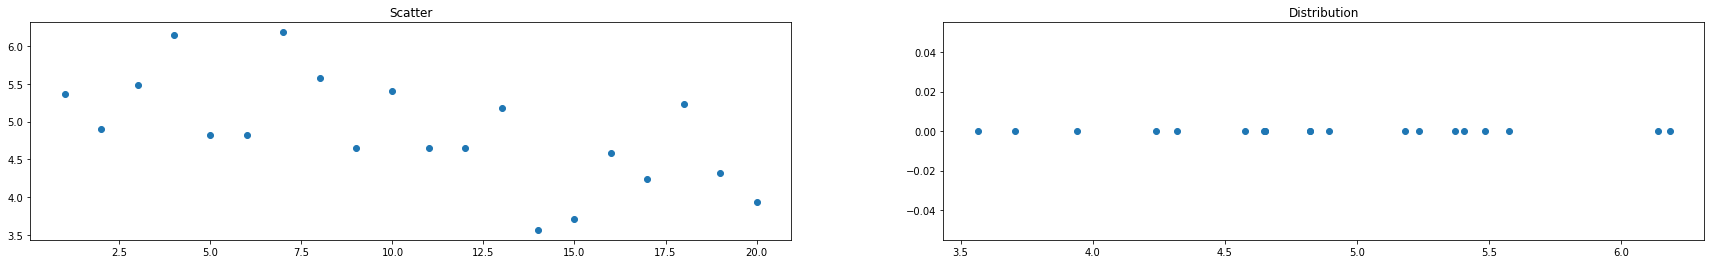

In [1]:
# Import some librearies to help us out
import numpy
from matplotlib import pyplot

# Define some population parameters
mu = 5
sigma = 0.75

# Create our sample data
numpy.random.seed(seed=42)
x = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
y = numpy.random.normal(loc=mu, scale=sigma, size=len(x))

# Plot the data
fig, (ax1, ax2) = pyplot.subplots(nrows=1, ncols=2)
ax1.scatter(x,y)
ax2.scatter(y, [0 for x in range(0, len(x))])
fig.set_figwidth(30)
ax1.set_title("Scatter")
ax2.set_title("Distribution");

## 3.3. Historgrams with Numpy

### 3.3.1. The numpy.histogram() function
The Numpy library offers a function to create a histogram based on a set of raw data.

The histogram is based on bins of data. It will divide the y axis into segments called bins and count how many occurances of a value fall into a given bin. The histogram we calculate is affectively representing a count of the data points found within a bin.

The numpy library represents the histogram as an array of counts, and an array of bin edges.

Note: There will always be one more edge (makred with a '|') than there are counts (marked with a $c_n$) as each ontinguous bin has two edges and the counts coresponde to a bin:

```| c1 | c1 | c3 |```

The function has a number of parameters which define how this works. See the documentation for more detail. Official documentation can be found here on the coresponding [numpy.org](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) page.

In [2]:
# Determine how many bins we want to use for our histogram
bins = 10

# Calculate the counts and bins for our numpy array
numpy_y = numpy.array(y)
counts, bin_edges = numpy.histogram(numpy_y, bins=bins)

Because the bins can contain a range of values, and not one discrete value, graphing the counts is a little tricky. There are two simple approaches we can take:
1. Give the bins numbers and show the counts against the bin numbers
2. Calculate the midpoints of the bin edges and show the counts against that point
3. Graph the counts against the left or right edge of the bin

All three can be seen below, respectively:

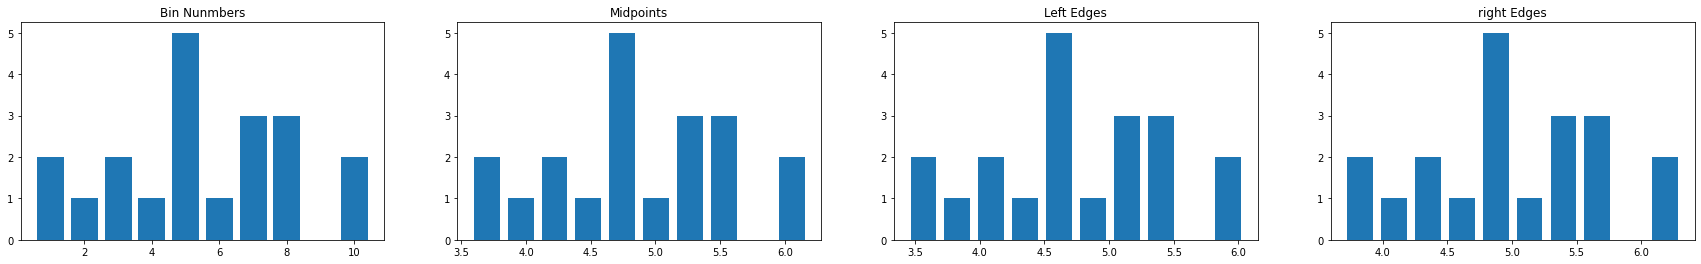

In [3]:
# Calculate values for the x axis of the histogram
bin_numbers = list(range(1, len(bin_edges)))
bin_midpoints = bin_edges[:-1] + (numpy.diff(bin_edges, 1) / 2)
bin_left_edges = bin_edges[:-1]
bin_right_edges = bin_edges[1:]

# Plot the histogram information as a bar chart
#
# Note: We set the witdh= parameter for the bar() function because 
#       by default it will glob bars together

fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(nrows=1, ncols=4)
bar_container = ax1.bar(bin_numbers, counts, width=0.8) # <- why 0.8 when the rest are 0.2 ???
bar_container = ax2.bar(bin_midpoints, counts, width=0.2)
bar_container = ax3.bar(bin_left_edges, counts, width=0.2)
bar_container = ax4.bar(bin_right_edges, counts, width=0.2)

fig.set_figwidth(30)
ax1.set_title("Bin Nunmbers")
ax2.set_title("Midpoints")
ax3.set_title("Left Edges")
ax4.set_title("right Edges");

## 3.4. Histogram with Pandas

### 3.4.1. Pandas DataFrame.hist() function

Pandas makes a histogram much easier becasue it hides a lot of the complexitied found in numpy and matplotlib.

The DataFrame.hist() function calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

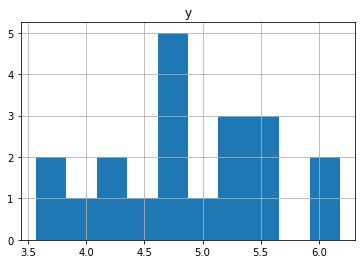

In [4]:
import pandas
df = pandas.DataFrame({"x": x, "y": y,})
subplots = df.hist("y", bins=bins)

But this is only a visualization. To work with the data we will need to use the numpy.histogram() function we saw earlier. We can convert our dataframe into a numpy array and then run the builtin function.

In [5]:
counts, bin_edges = numpy.histogram(df["y"].to_numpy(), bins=bins)

While Pandas has some nice builtin functionality for plotting, it also comes with some bugs. Conside the graphs below; the x-axis is wrong on the third plot. Generally speaking its best to go through native matplotlib functions at the end of the day.